<a href="https://colab.research.google.com/github/Babu6030/Bike-Sharing-Demand-Prediciton/blob/main/Babu_Reddy_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>



## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **1.Importing Libraries and Dataset**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#import Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone EDA Project/Bike sharing Demand/SeoulBikeData.csv', encoding="ISO-8859-1")
#Head
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#type and shape information/ Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### **2.Looking for and Handling NaN/ Null/Missing Values**

In [ ]:
# checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

It is evident like the data set doesn't contain any null values

In [ ]:
#checking for Duplication 
df.duplicated().sum()

0

It is evident that there is no duplication of data *present*

In [ ]:
#Description
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,15/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.tail(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### **3.Exploratory Data Conclusion From Data Like Correlation, Trends and Appropriate Visualisations**

In [ ]:
#Bike rents with different seasons.
count=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
count

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


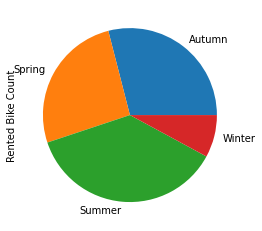

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()
plt.show()

From the Above data it is Evident that Summer is having the highest booking count

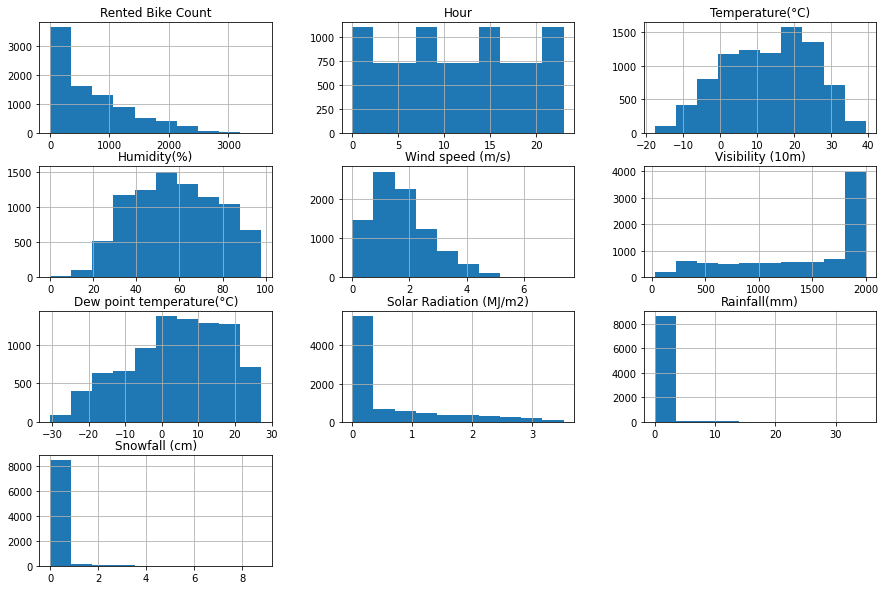

In [ ]:
#Visualizing maximum count of particular coloumn.
df.hist(figsize = (15,10))
plt.show()

*From above Histogram plots we can see the maximum counts and variations*

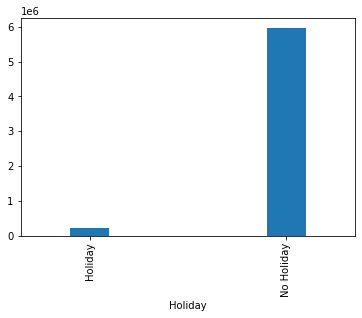

In [ ]:
# Visualizing Bike Rents on Holidays
df.groupby('Holiday').sum()['Rented Bike Count'].plot.bar(width=0.2)
plt.show()

It looks like in Seoul people are always use rented bikes for going to office and colleges.

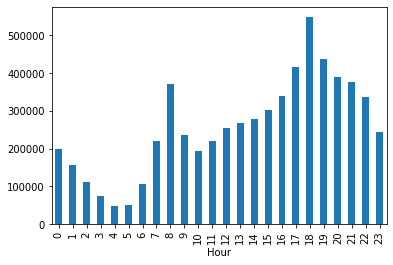

In [ ]:
#Visualizing Bike Rents on Hourly Basis.
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
plt.show()

From above plot, we can conclude that at evening 6PM is the time to make more rented bikes available.

In [ ]:
#converting date formate
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
 
df['Day']=df["Date"].dt.day_name()
df['Month']=df['Date'].dt.month

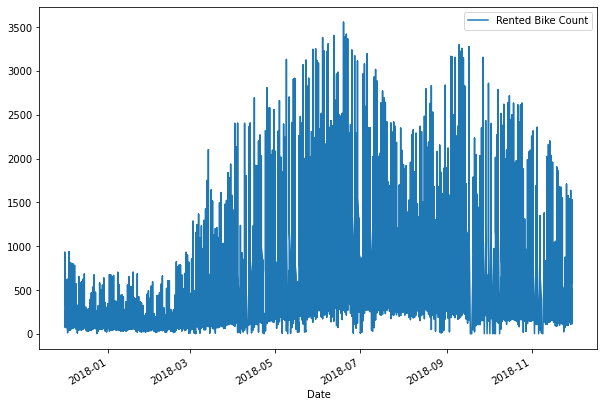

In [ ]:
#visualisation on Bike Rented on date
df.plot(x='Date',y='Rented Bike Count',kind='line',figsize = (10,7))
plt.show()

From above plot it shows that sales is highest in June to July month

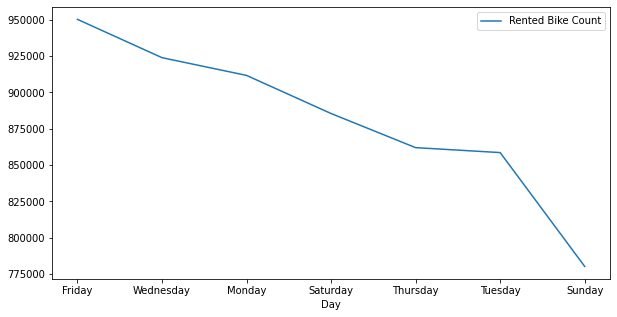

In [ ]:
pd.DataFrame(df.groupby('Day').sum()['Rented Bike Count'].sort_values(ascending=False)).plot(figsize = (10,5))
plt.show()

From above plot
It shows bikes are used more on Friday

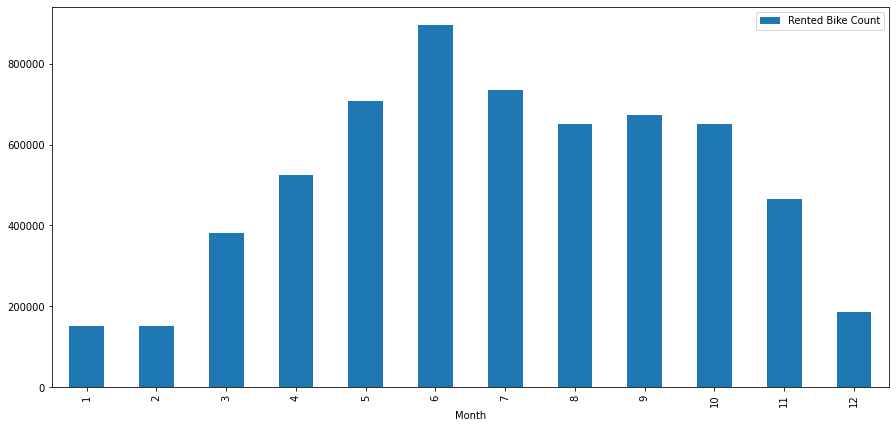

In [ ]:
a=pd.DataFrame(df.groupby('Month').sum()['Rented Bike Count'].sort_values(ascending=True))
a=a.sort_values('Month',ascending=True)
a.plot(kind='bar',figsize = (15,7))
plt.show()

Since count is high in the month June so we tried to check other values variation in june

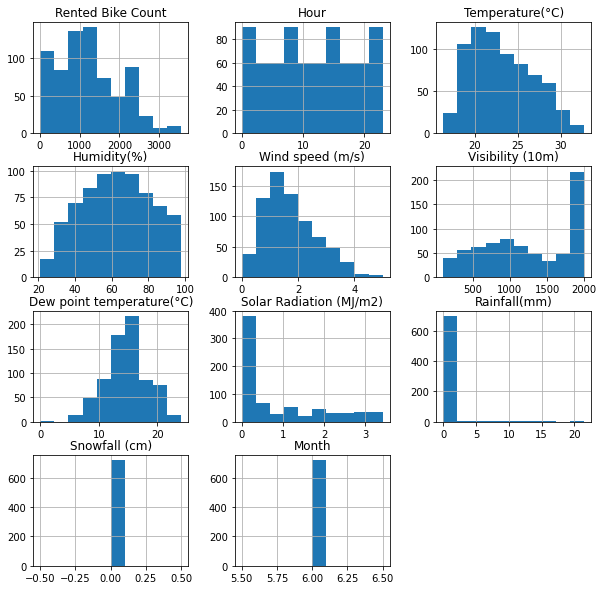

In [ ]:
#separate the dataset for the month June and plot other variables
b=df.loc[df['Month']==6]
b.hist(figsize=(10,10))
plt.show()

from above observation we can see variations in values 

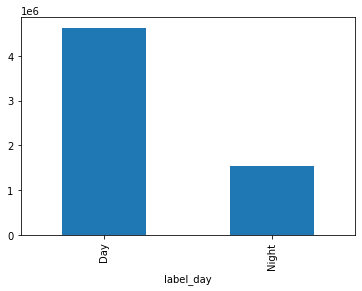

In [ ]:
df['label_day']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
df.groupby('label_day').sum()['Rented Bike Count'].plot.bar()
plt.show()

From above observation most bikes are used in Day time

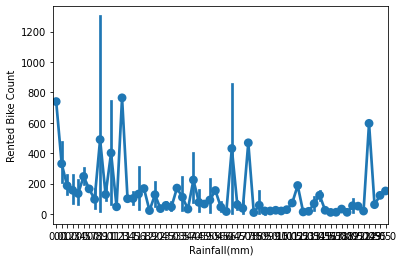

In [ ]:
sns.pointplot(x='Rainfall(mm)',y="Rented Bike Count",data=df)
plt.show()

From Above Plot there are more outliners present in the data

In [ ]:
#Label Encoding Converts all labels into Numeric data.
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

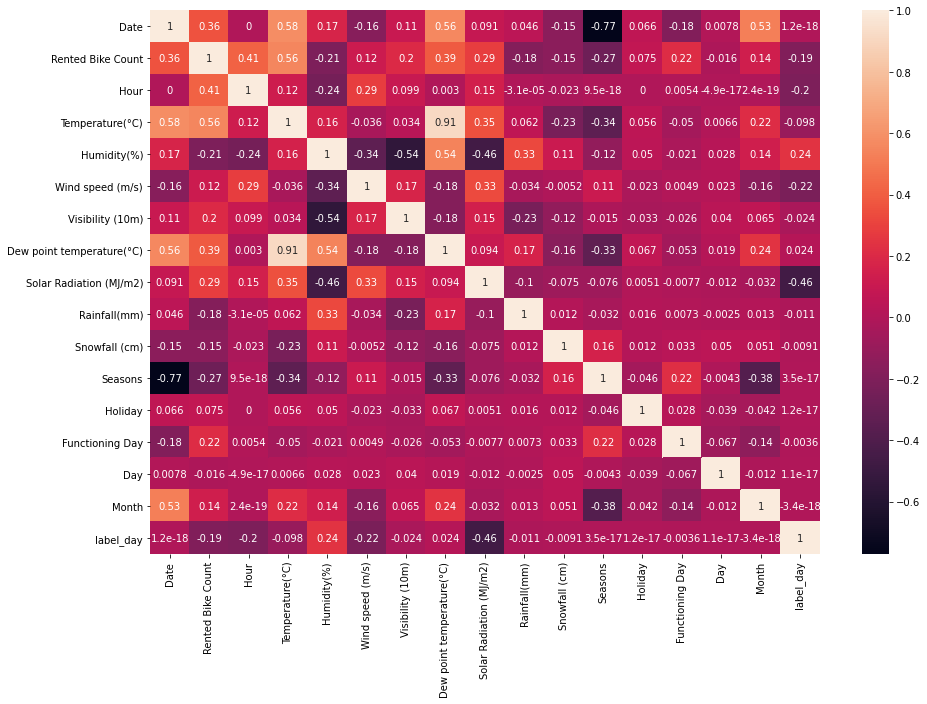

In [ ]:
#Correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Droping few high Correlated and Outliners data in  Columns
df=df.drop(['Dew point temperature(°C)','Date','Day','Functioning Day','label_day','Rainfall(mm)','Snowfall (cm)'], axis=1)

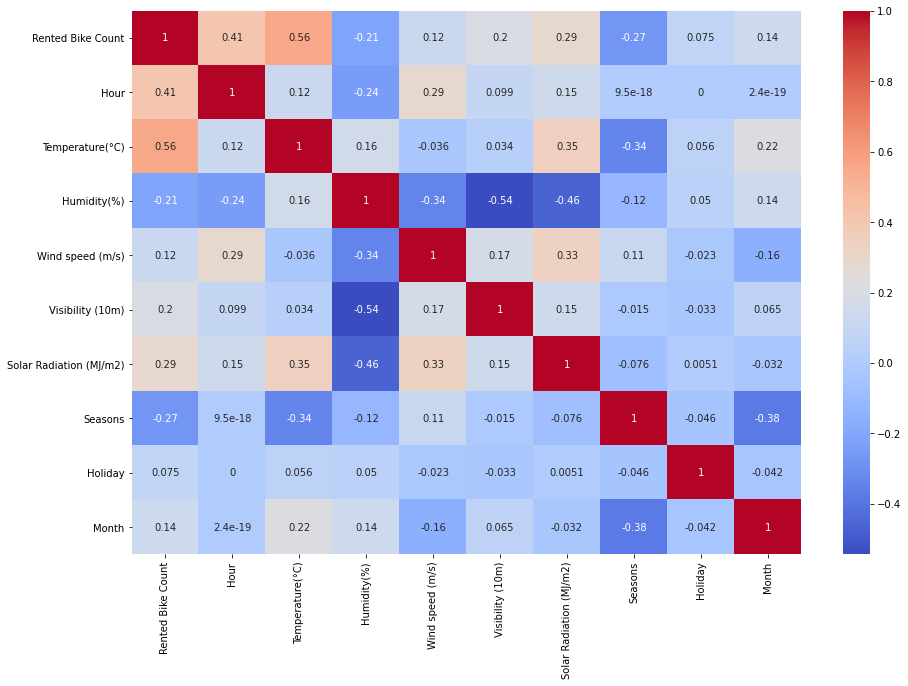

In [ ]:
#Rechecking for Correlational Data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

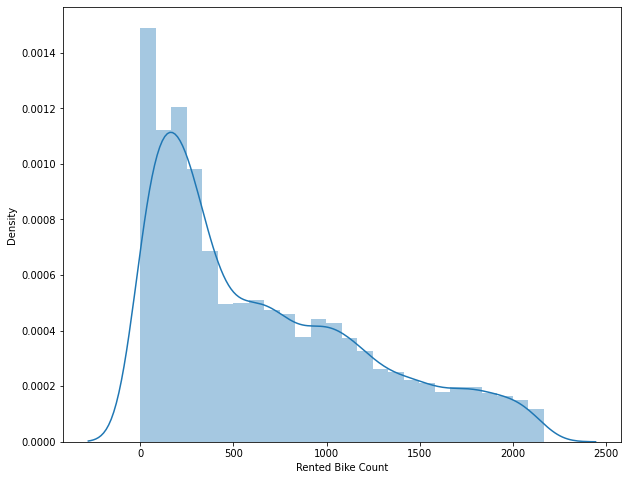

In [ ]:
#Checking the Distribution of Independent variable data
plt.figure(figsize=(10,8))
sns.distplot(df['Rented Bike Count'])
plt.show()

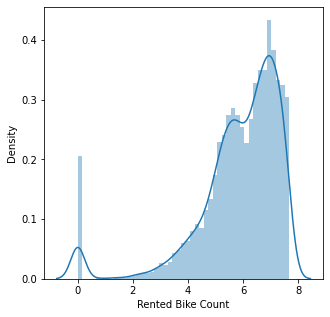

In [ ]:
#Since its Positively Skewed, Applied Log transformation to Data 
plt.figure(figsize=(5,5))
sns.distplot(np.log1p(df['Rented Bike Count']))
plt.show()
df['Rented Bike Count']=np.log1p(df['Rented Bike Count'])


### **4.Machine Learning Models**

In [ ]:
#Prepare a Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
x=df.iloc[:,df.columns!='Rented Bike Count']
y=df.iloc[:,df.columns =='Rented Bike Count']

In [ ]:
models=[LinearRegression(),Ridge(),Lasso(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor()]

In [ ]:
def train(model):
  kf=KFold(n_splits=5,random_state=32,shuffle=True)
  prediction=cross_val_score(model,x,y,cv=kf,scoring='neg_mean_squared_error')
  cv_score=prediction.mean()
  print('Model:', model)
  print('CV score:',abs(cv_score))
  print(" ")

In [ ]:
for model in models:
  train(model)

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV score: 1.871446514824403
 
Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV score: 1.8714433197371552
 
Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV score: 1.9122931778780088
 
Model: ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
CV score: 1.8876003950603384
 
Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
            

### Extra Tress Regressor and Random Forest Turned out to the Best CV score

In [ ]:
#split the data to be trained
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

1) Linear Regression

In [ ]:
lr=LinearRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('MSE =',mean_squared_error(y_test, y_pred))
print('RMSE = ',sqrt(mean_squared_error(y_test, y_pred)))

print('coefficient_of_dermination\ R2 Square = ',r2_score(y_pred, y_test))

MSE = 1.7825533343496824
RMSE =  1.3351229660033874
coefficient_of_dermination\ R2 Square =  -2.164610543149734


In [ ]:
y_test.shape

(1752, 1)

2.Elastic net regularization

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
x, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(x_train, y_train)
ElasticNetCV(cv=5, random_state=0)
print('Alpha',regr.alpha_)
y_pred=regr.predict(x_test)
print('RMSE= ',sqrt(mean_squared_error(y_test, y_pred)))

print('coefficient_of_dermination\ R2 Square = ',r2_score(y_pred, y_test))

Alpha 0.29217138822293703
RMSE=  1.3400393497520109
coefficient_of_dermination\ R2 Square =  -2.3672813106317956


3.Fit a random forest classifier and observe the accuracy.

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor

from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 101)

# fit the regressor with x and y data
regressor.fit(x_train, y_train)

print('Random Forest R2 score is',regressor.score(x_test,y_test))
from sklearn.metrics import r2_score

print('MSE =',mean_squared_error(y_test, y_pred))
print('RMSE = ',sqrt(mean_squared_error(y_test, y_pred)))
print('coefficient_of_dermination\ R2 Square = ',r2_score(y_pred, y_test))

Random Forest R2 score is 0.4862117170777046
MSE = 1.795705458883792
RMSE =  1.3400393497520109
coefficient_of_dermination\ R2 Square =  -2.3672813106317956


Tunning the random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [200], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(x_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(x_test,y_test)

In [ ]:
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))

The best Random Forest R2 test score is : 0.48 with n estimators = 200.00, max depth : 70.00, min samples split : 2 and min samples leaf : 1  
 


In [ ]:
#Lets Visualize the Important feature variable.

In [ ]:
features = df.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

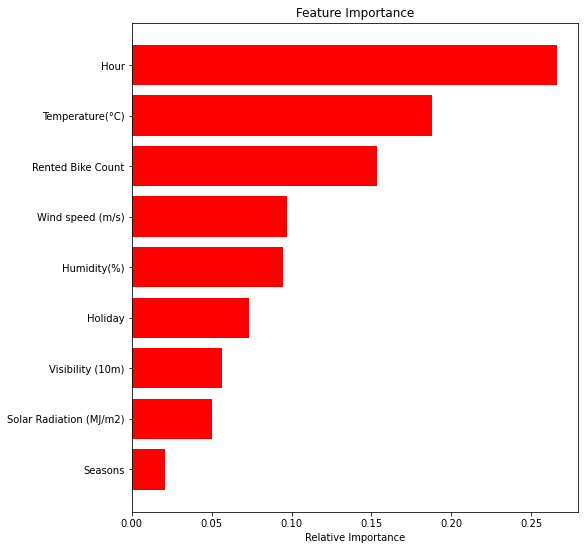

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,9)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

4.Fitting the Extra Trees Regressor

In [ ]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [200,100,150,500], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[1,2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             par

In [ ]:
best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(x_test,y_test)
 
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 test score is : 0.57 with n estimators = 400.00, max depth : 60.00, min samples split : 2 and min samples leaf : 1  
 


##**Summary**
# *   Most of bikes rented in Evening followed by Morning hours i.e. shows people used to used commute for work.
# *   Bike Rents are high during day time than night
# *   We see Rainfall values are most of the time is zero and but we saw some Outliner values we can say that people enjoy during the rainfall.
# *   Optimal Conditions for Bookings are 25°c, 18:00hrs, June to July, Working Days, Summer and No Rainfall and Snowfall.
# *   The performance of prediction is good with Extra Tree and Random Forest after tuning with n_estimators to 200 and max_depth to 60 R2 score was improved.

```

